In [2]:
"""
Regresión Polinomial
@author: ligdigonzalez
"""
########## LIBRERÍAS A UTILIZAR ##########
#Se importan la librerias a utilizar
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


In [3]:
########## PREPARAR LA DATA ##########
#Importamos los datos de la misma librería de scikit-learn
boston = datasets.load_boston()
print(boston)
print()


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
########## ENTENDIMIENTO DE LA DATA ##########
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(boston.keys())
print()
#Verifico las características del dataset
print('Características del dataset:')
print(boston.DESCR)
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(boston.data.shape)
print()
#Verifico la información de las columnas
print('Nombres columnas:')
print(boston.feature_names)


Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD    

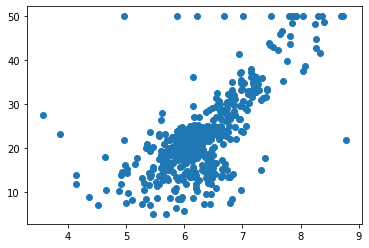

In [5]:
########## PREPARAR LA DATA REGRESIÓN POLINOMIAL ##########
#Seleccionamos solamente la columna 6 del dataset
X_p = boston.data[:, np.newaxis, 5]
#Defino los datos correspondientes a las etiquetas
y_p = boston.target
#Graficamos los datos correspondientes
plt.scatter(X_p, y_p)
plt.show()


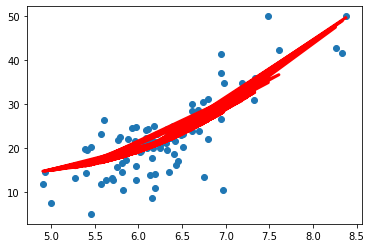


DATOS DEL MODELO REGRESIÓN POLINOMIAL

Valor de la pendiente o coeficiente "a":
[  0.         -23.74220204   2.54624865]
Valor de la intersección o coeficiente "b":
69.91547282971551
Precisión del modelo:
0.5312237656322738


In [6]:
########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2)
from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)
#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()
#Entreno el modelo
pr.fit(X_train_poli, y_train_p)
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)
#Graficamos los datos junto con el modelo
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()
print()
print('DATOS DEL MODELO REGRESIÓN POLINOMIAL')
print()
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))